# Сессия 3

импорты

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import numpy as np

Загрузка данных и предобработка

In [2]:
sop1 = pd.read_csv("sop1.csv", index_col=0)
sop2 = pd.read_csv("sop2.csv", index_col=0)
sop3 = pd.read_csv("sop3.csv", index_col=0)

In [3]:
sop1 = sop1.reset_index()
sop1 = sop1.drop(["0"],axis=1)
sop2 = sop2.reset_index()
sop2 = sop2.drop(["0"],axis=1)
sop3 = sop3.reset_index()
sop3 = sop3.drop(["0"],axis=1)

In [4]:
a=[i for i in range(1,17)]
sop1.columns = a
sop2.columns = a
sop3.columns = a

In [5]:
d={"Number_of_method": np.arange(1,17), "methods": ["Эхо-метод", "Эхо-метод", "Эхо-метод", "Эхо-метод", "Теневой метод", "Теневой метод","Эхо-метод", "Эхо-метод", 
  "Эхо-контактный", "Эхо-контактный", "Эхо-контактный", "Эхо-контактный", "Теневой метод", "Теневой метод", "Эхо-контактный", "Эхо-контактный"]}
methods=pd.DataFrame(data=d)
methods=methods.set_index("Number_of_method")
methods["Схема"]=["Хордовая", "Хордовая", "Раздельно-совмещенная", "Раздельно-совмещенная", "Раздельно-совмещенная",
                      "Раздельно-совмещенная", "Хордовая", "Хордовая", "Раздельно-совмещенная", "Раздельно-совмещенная",
                      "Хордовая", "Хордовая", "Хордовая", "Хордовая", "Хордовая", "Хордовая"]
methods

,methods,Схема
Number_of_method,,
1,Эхо-метод,Хордовая
2,Эхо-метод,Хордовая
3,Эхо-метод,Раздельно-совмещенная
4,Эхо-метод,Раздельно-совмещенная
5,Теневой метод,Раздельно-совмещенная
6,Теневой метод,Раздельно-совмещенная
7,Эхо-метод,Хордовая
8,Эхо-метод,Хордовая
9,Эхо-контактный,Раздельно-совмещенная


Мы будем использовать все данные тк каждое значение является показателем с какого-то датчика. Из прошлой сессии мы выяснили, расстояние между схемами прозмучивания равно 95, а от начала отсчета до первой схемы 50. Сдвинем наши данные на 145мм для хордовой и 50 для РС схемы

In [6]:
hord = [1,2,7,8,11,12,13,14,15,16]
rs=[3,4,5,6,10]

In [7]:
for i in hord:
    sop1[i] = pd.concat([sop1[i][145:],sop1[i][:145]],ignore_index=True)
for i in rs:
    sop1[i] = pd.concat([sop1[i][50:],sop1[i][:50]],ignore_index=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001E01EA504C8>,
      dtype=object)

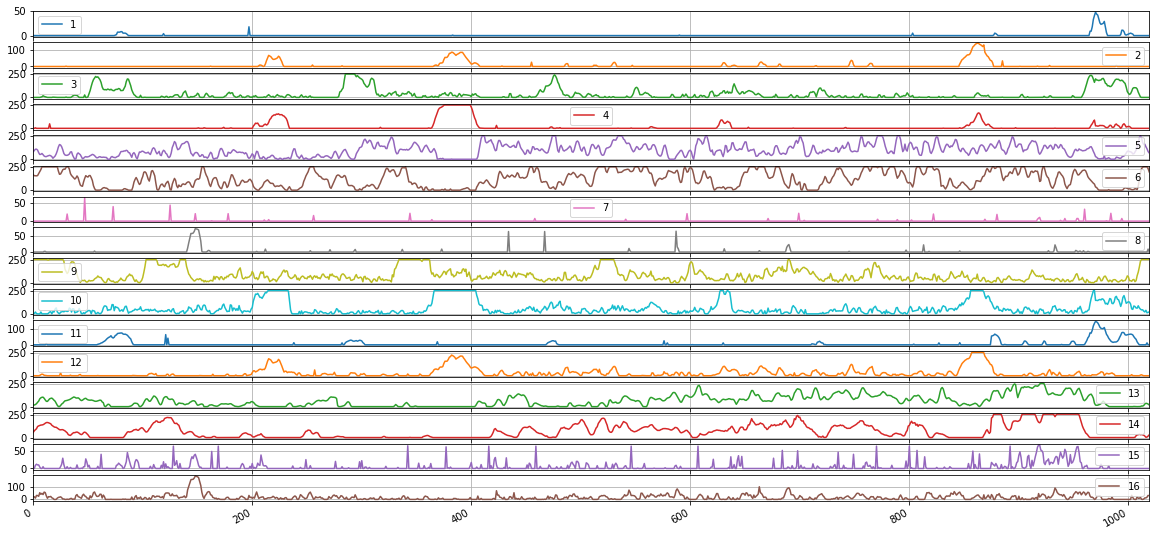

In [8]:
sop1.plot(subplots=True,figsize=(20,10),grid="on")

In [9]:
for i in hord:
    sop2[i] = pd.concat([sop2[i][145:],sop2[i][:145]],ignore_index=True)
for i in rs:
    sop2[i] = pd.concat([sop2[i][50:],sop2[i][:50]],ignore_index=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001E01EA50588>,
      dtype=object)

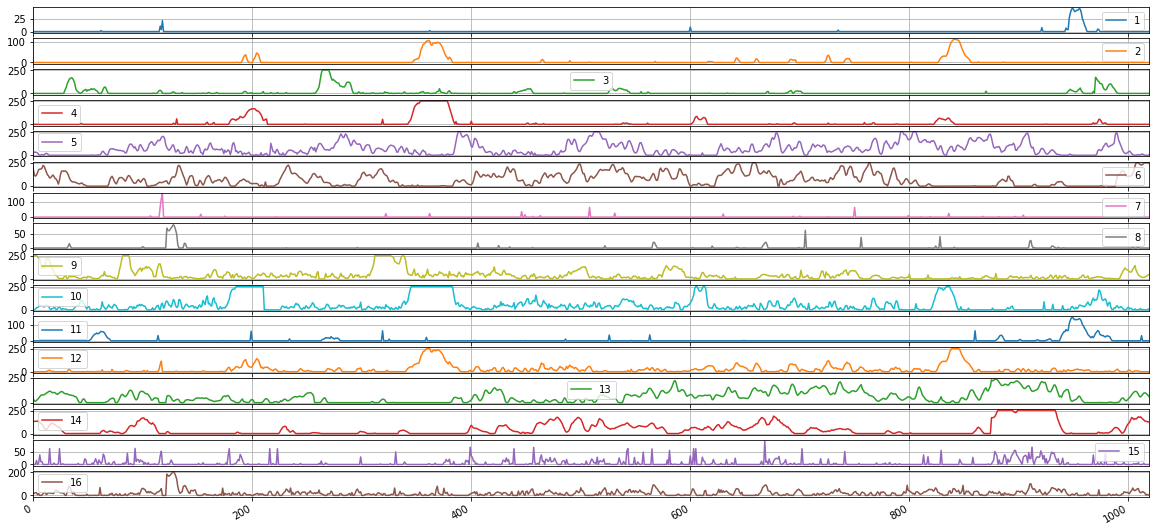

In [10]:
sop2.plot(subplots=True,figsize=(20,10),grid="on")

In [11]:
for i in hord:
    sop3[i] = pd.concat([sop3[i][145:],sop3[i][:145]],ignore_index=True)
for i in rs:
    sop3[i] = pd.concat([sop3[i][50:],sop3[i][:50]],ignore_index=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001E01F4C62C8>,
      dtype=object)

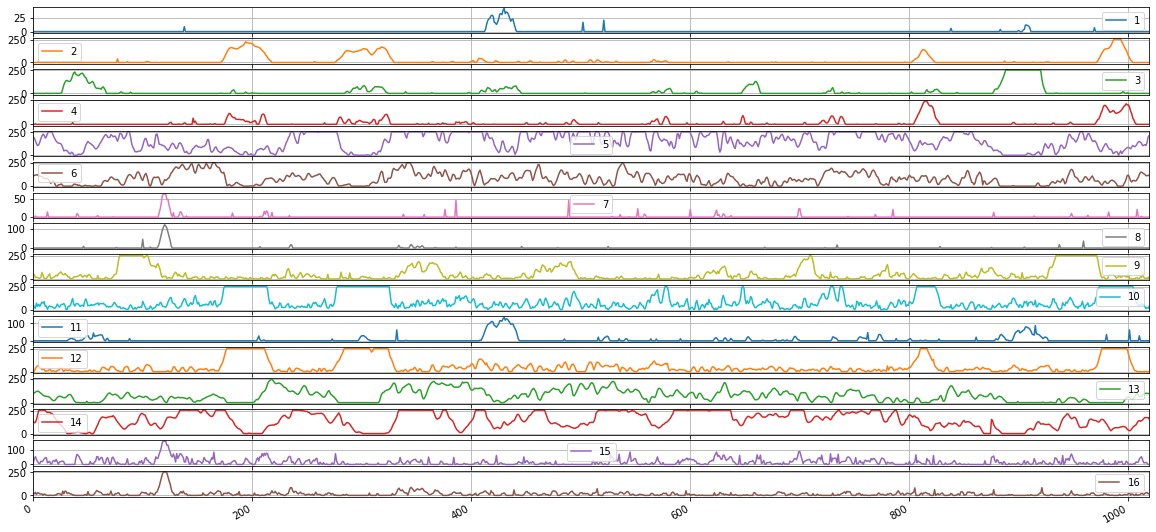

In [12]:
sop3.plot(subplots=True,figsize=(20,10),grid="on")

Разобьем датасеты по методам прозвучивания и посчитаем разные матфункции от их совокупности, это подскажет нам как себя ведут данные вместе по методам. Это и будут наши новые данные.

In [13]:
E = [1, 3, 7, 8]
EC = [9, 11, 15, 16]
SH = [5, 6, 13, 14]

In [14]:
def newvals(df, data, n):
    df[n + "_mean"]=data.mean(axis=1)
    df[n + "_median"]=data.median(axis=1)
    df[n + "_std"]=data.std(axis=1)
    df[n + "_min"]=data.min(axis=1)
    df[n + "_max"]=data.max(axis=1)

In [15]:
newvals(sop1, sop1[E], "echo")
newvals(sop1, sop1[EC], "echo_cont")
newvals(sop1, sop1[SH], "shadow")

newvals(sop2, sop2[E], "echo")
newvals(sop2, sop2[EC], "echo_cont")
newvals(sop2, sop2[SH], "shadow")

newvals(sop3, sop3[E], "echo")
newvals(sop3, sop3[EC], "echo_cont")
newvals(sop3, sop3[SH], "shadow")

nv=[]
for i in ["echo","echo_cont","shadow"]:
    for j in ["_mean","_median","_std","_min","_max",]:
        nv.append(i+j)

Отрисуем то что  получилось для первого sop

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001E0204DD9C8>,
      dtype=object)

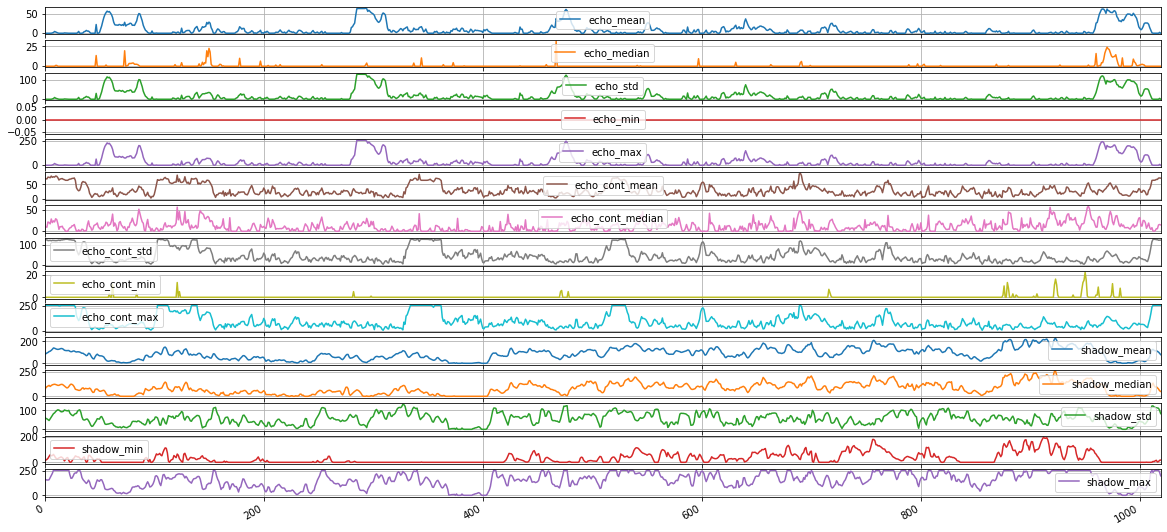

In [16]:
sop1[nv].plot(subplots=True,figsize=(20,10),grid="on")

Теперь поработаем с таргетными значениями. Нам дана таблица с указаниями где начинается дефект и его длина. Разметим массив длиной 1020 так, что пусть то, что входит в эти промежутки будет равно 1, а остальное 0.

In [17]:
target1=pd.read_csv("./targets/sop1_target.csv")

In [18]:
target1

,Начало дефекта,Длина дефекта,Высота дефекта,Тип дефекта,Сторона
0,27,42.0,4.5,L,A
1,162,42.0,6.0,L,B
2,257,46.0,8.0,L,B
3,376,38.0,3.0,L,A
4,512,23.0,1.5,L,A
5,584,29.0,2.5,L,A
6,654,25.0,1.5,L,B
7,729,29.0,3.0,L,B
8,801,46.0,8.0,L,A
9,886,36.0,4.5,L,B


In [19]:
tars = pd.DataFrame(data=[0]*1020)

In [20]:
tars[27:27+42] = 1
tars[162:162+42] = 1
tars[257:257+46] = 1
tars[376:376+38] = 1
tars[512:512+23] = 1
tars[584:584+29] = 1
tars[654:654+25] = 1
tars[729:729+29] = 1
tars[801:801+46] = 1
tars[886:886+36] = 1
tars[141:141+1] = 1

In [21]:
tar1 = pd.read_csv("./targets/target1.csv")
tar2 = pd.read_csv("./targets/target2.csv")
tar3 = pd.read_csv("./targets/target3.csv")

In [22]:
tars1 = pd.DataFrame(data=[0]*1020)
tars1[51:51+42] = 1
tars1[200:200+40] = 1
tars1[278:278+39] = 1
tars1[365:365+43] = 1
tars1[460:460+27] = 1
tars1[845:845+36] = 1
tars1[959:959+62] = 1
tars1[141:141+1] = 1

In [23]:
tars2 = pd.DataFrame(data=[0]*1020)
tars2[178:178+37] = 1
tars2[258:258+38] = 1
tars2[337:337+53] = 1
tars2[822:822+37] = 1
tars2[957:957+48] = 1
tars2[123:123+1] = 1

In [24]:
tars3 = pd.DataFrame(data=[0]*1020)
tars3[26:26+42] = 1
tars3[172:172+47] = 1
tars3[276:276+55] = 1
tars3[795:795+34] = 1
tars3[877:877+49] = 1
tars3[971:971+50] = 1
tars3[112:112+1] = 1

In [25]:
sop1_ident_T = sop1
sop1_ident_T["target"] = tars
sop2_ident_T = sop2
sop2_ident_T["target"] = tars
sop3_ident_T = sop3
sop3_ident_T["target"] = tars

In [26]:
sop1_tar = sop1
sop1_tar["target"] = tars1
sop2_tar = sop2
sop2_tar["target"] = tars2
sop3_tar = sop3
sop3_tar["target"] = tars3

Сейчас у нас имеется 31 переменная и мы хотим немного сократить это число. Для этого нам надо узнать какие переменные представляют интерес, а какие нет. Использовать для этого будем случайный лес и его метод feature importance

In [27]:
from sklearn.ensemble import RandomForestClassifier

In [28]:
X,y = sop1_tar.drop("target", axis=1), sop1_tar["target"]
rnd_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=42)
rnd_clf.fit(X, y)
# for name, importance in zip(X.columns, rnd_clf.feature_importances_):
#     print(name, "=", importance)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

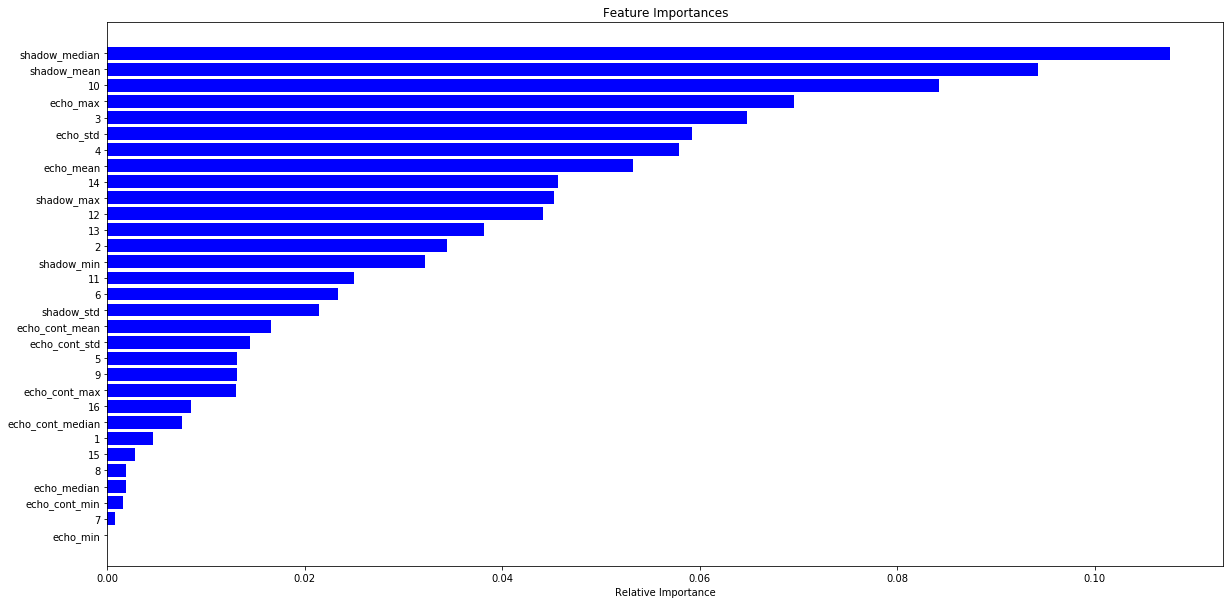

In [29]:
features = X.columns
importances = rnd_clf.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(20,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [30]:
X,y = sop2_tar.drop("target", axis=1), sop2_tar["target"]
rnd_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=42)
rnd_clf.fit(X, y)
# for name, importance in zip(X.columns, rnd_clf.feature_importances_):
#     print(name, "=", importance)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

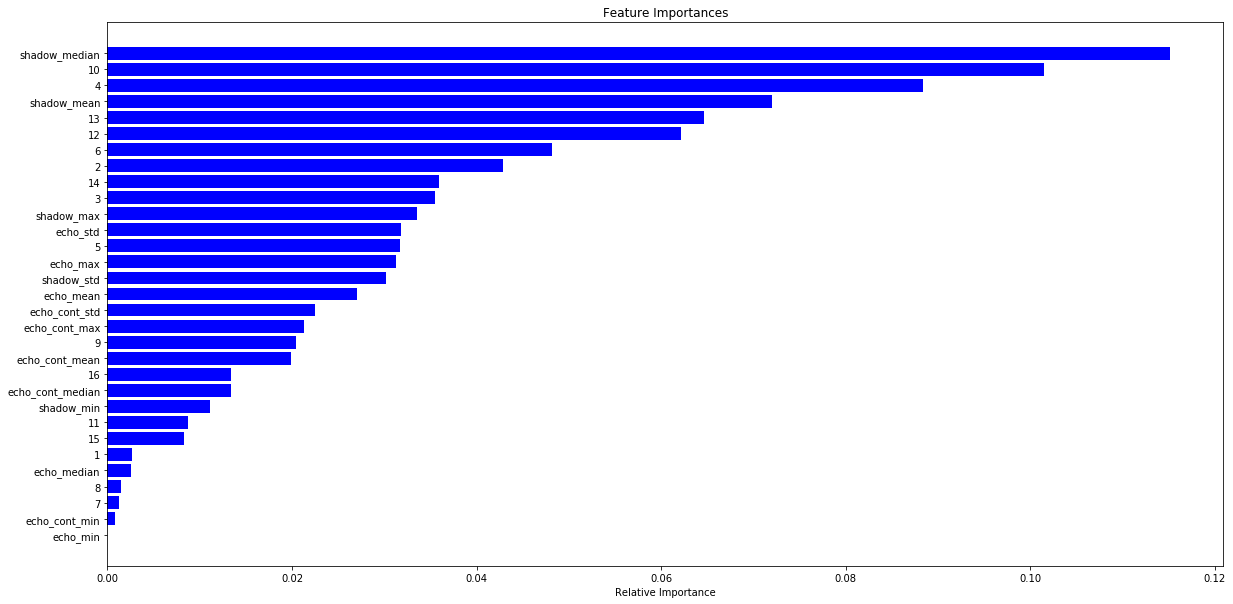

In [31]:
features = X.columns
importances = rnd_clf.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(20,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [32]:
X,y = sop2_tar.drop("target", axis=1), sop2_tar["target"]
rnd_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=42)
rnd_clf.fit(X, y)
# for name, importance in zip(X.columns, rnd_clf.feature_importances_):
#     print(name, "=", importance)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

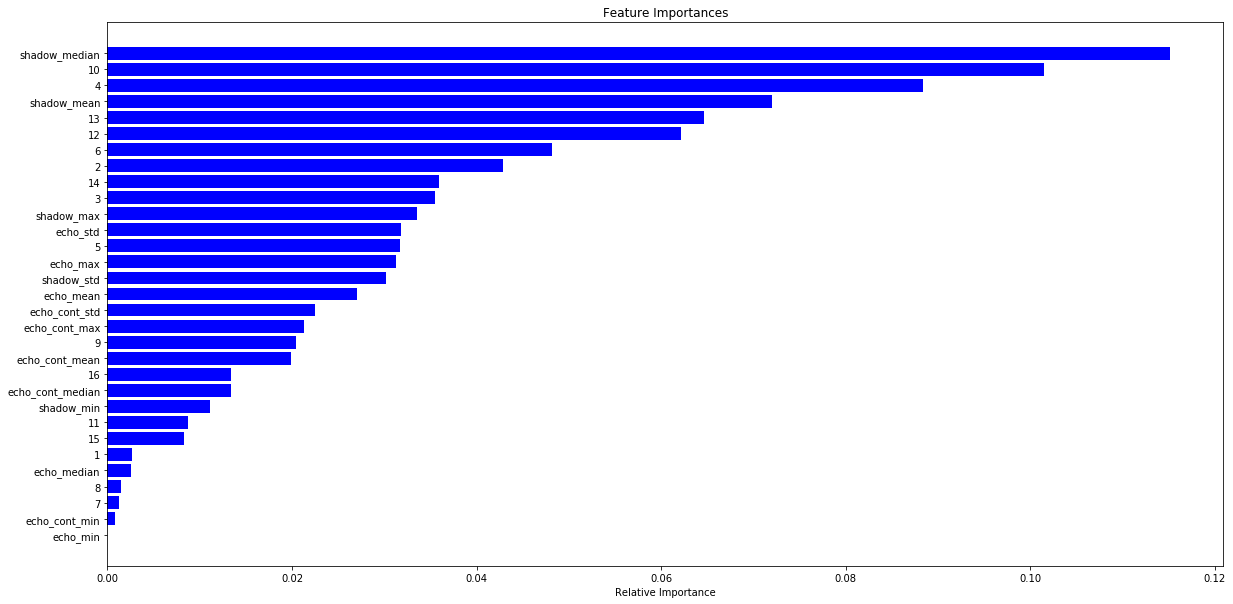

In [33]:
features = X.columns
importances = rnd_clf.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(20,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Из всех трех датасетов видно что  на результат слабо влияют следущие переменные: `1,7,8,echo_min,echo_median,echo_count_min`. Следовательно их можно убрать из нашей выборки

In [34]:
drop = [1,7,8,"echo_min","echo_median","echo_cont_min"]

In [35]:
sop1_tar.drop(drop, axis=1, inplace=True)
sop2_tar.drop(drop, axis=1, inplace=True)
sop3_tar.drop(drop, axis=1, inplace=True)

In [47]:
sop1_tar.to_csv("sop1_t.csv")
sop2_tar.to_csv("sop2_t.csv")
sop3_tar.to_csv("sop3_t.csv")

### Этап Кластеризации. <br>
На этом этапе мы рассмотри кластеризацию на примере трех моделей: KMeans, DBSCAN, MeanShift

In [36]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, MeanShift

In [37]:
pca = PCA(n_components=2)
pca_feat = pca.fit_transform(sop1)

### Kmeans(n_cluster = 2)

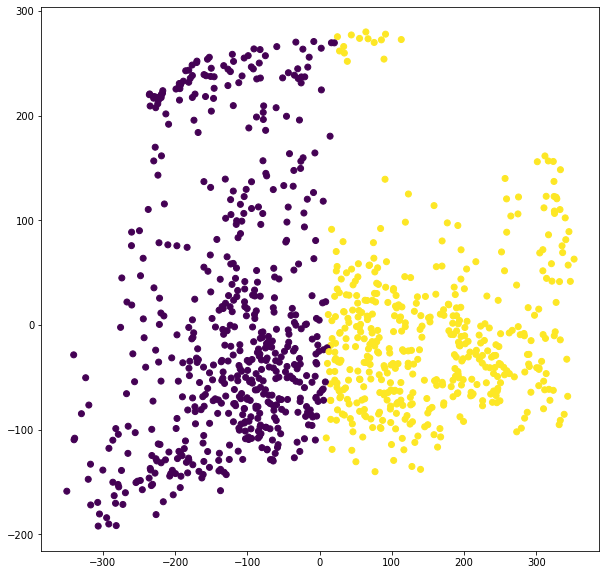

In [38]:
kmeans = KMeans(n_clusters=2, random_state=0, init="k-means++")
kmeans.fit(sop1)
kmeans_pred = kmeans.fit_predict(sop1)
plt.figure(figsize=(10,10))
plt.scatter(pca_feat[:,0], pca_feat[:,1], c = kmeans_pred)

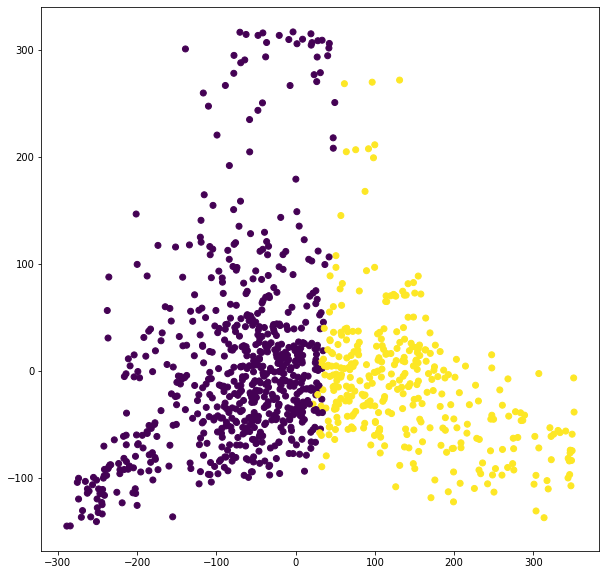

In [39]:
pca = PCA(n_components=2)
pca_feat = pca.fit_transform(sop2)
kmeans = KMeans(n_clusters=2, random_state=0, init="k-means++")
kmeans.fit(sop2)
kmeans_pred = kmeans.fit_predict(sop2)
plt.figure(figsize=(10,10))
plt.scatter(pca_feat[:,0], pca_feat[:,1], c = kmeans_pred)

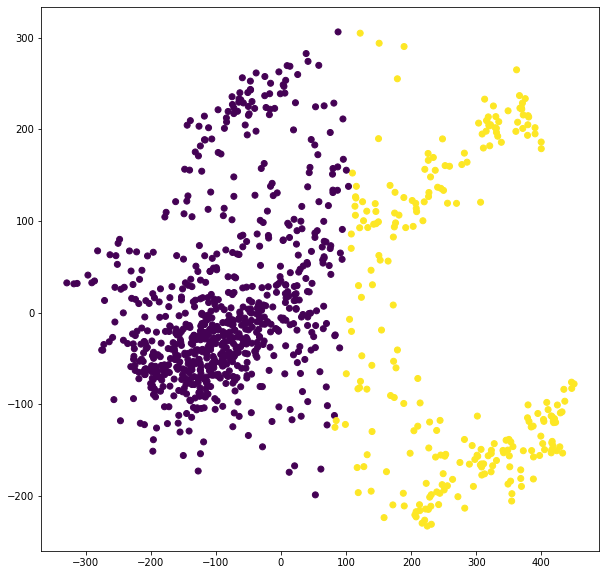

In [40]:
pca = PCA(n_components=2)
pca_feat = pca.fit_transform(sop3)
kmeans = KMeans(n_clusters=2, random_state=0, init="k-means++")
kmeans.fit(sop3)
kmeans_pred = kmeans.fit_predict(sop3)
plt.figure(figsize=(10,10))
plt.scatter(pca_feat[:,0], pca_feat[:,1], c = kmeans_pred)

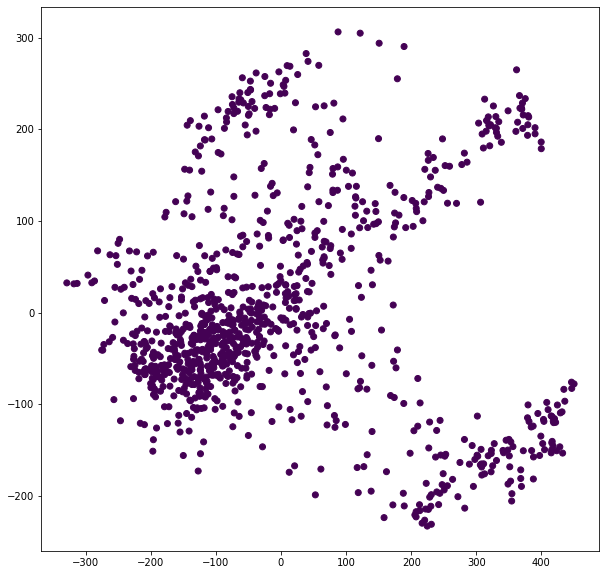

In [41]:
dbs = DBSCAN()
dbs.fit(sop1)
dbspr = dbs.fit_predict(sop1)
plt.figure(figsize=(10,10))
plt.scatter(pca_feat[:,0], pca_feat[:,1], c = dbspr)


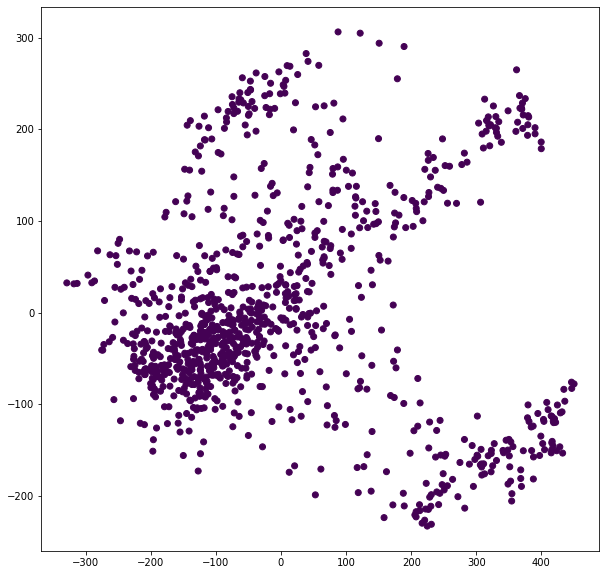

In [42]:
dbs = DBSCAN()
dbs.fit(sop2)
dbspr = dbs.fit_predict(sop2)
plt.figure(figsize=(10,10))
plt.scatter(pca_feat[:,0], pca_feat[:,1], c = dbspr)


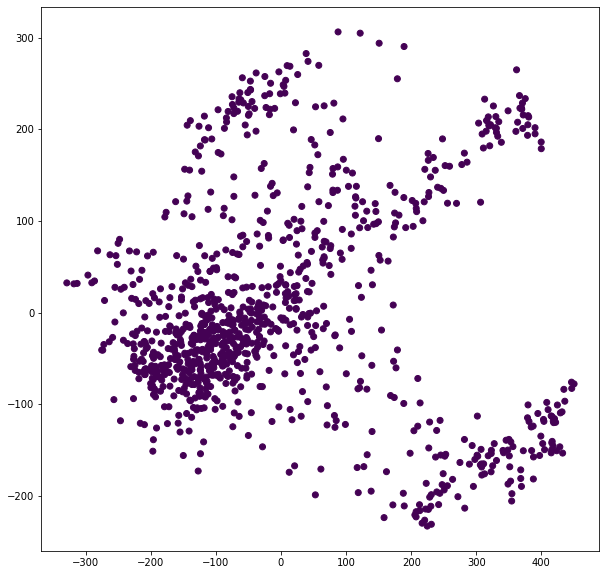

In [43]:
dbs = DBSCAN()
dbs.fit(sop3)
dbspr = dbs.fit_predict(sop3)
plt.figure(figsize=(10,10))
plt.scatter(pca_feat[:,0], pca_feat[:,1], c = dbspr)


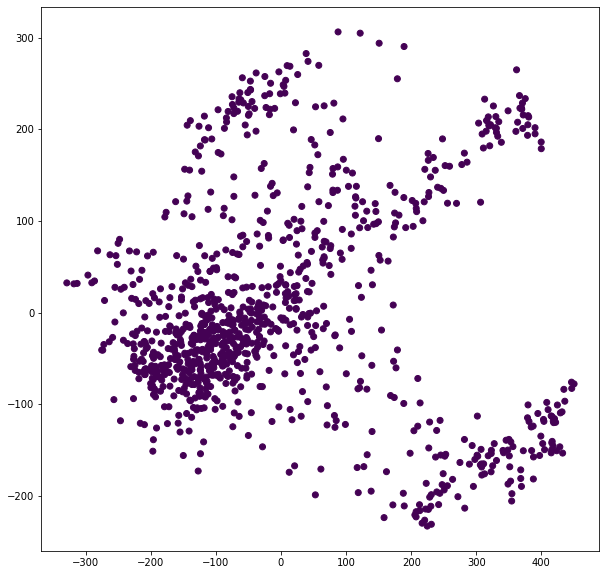

In [44]:
mshift = MeanShift()
mshift.fit(sop1)
pred_msh = mshift.fit_predict(sop1)

plt.figure(figsize=(10,10))
plt.scatter(pca_feat[:,0], pca_feat[:,1], c = pred_msh)

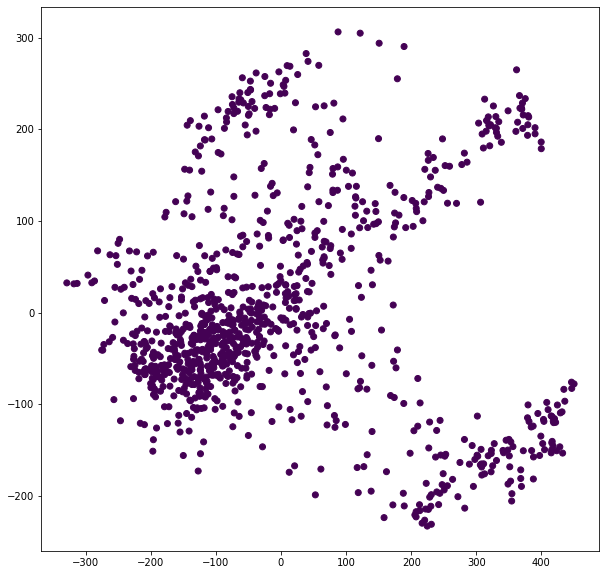

In [45]:
mshift = MeanShift()
mshift.fit(sop2)
pred_msh = mshift.fit_predict(sop2)

plt.figure(figsize=(10,10))
plt.scatter(pca_feat[:,0], pca_feat[:,1], c = pred_msh)

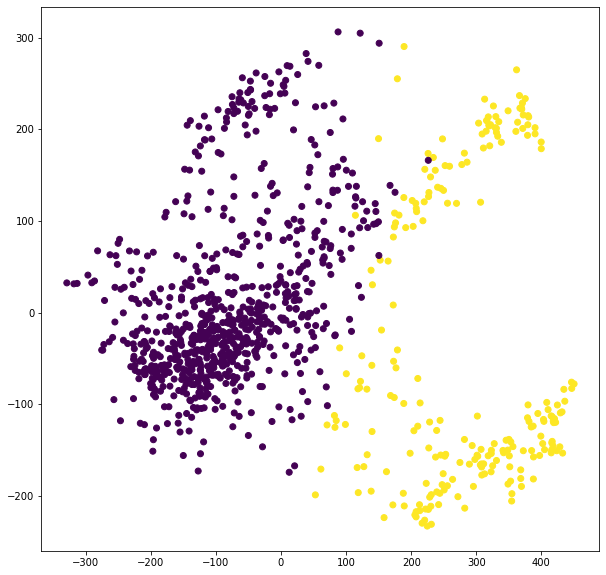

In [46]:
mshift = MeanShift()
mshift.fit(sop3)
pred_msh = mshift.fit_predict(sop3)

plt.figure(figsize=(10,10))
plt.scatter(pca_feat[:,0], pca_feat[:,1], c = pred_msh)

Из всех трех моделей лучше всего кластеризация видна на KMeans